In [33]:
# load the father-son dataset
import pandas as pd
import numpy as np

df = pd.read_csv("father_son.csv")

# two columns are in the dataset: fheight (father height) and sh (son height)
df

,fheight,sheight
0,65.04851,59.77827
1,63.25094,63.21404
2,64.95532,63.34242
3,65.75250,62.79238
4,61.13723,64.28113
5,63.02254,64.24221
6,65.37053,64.08231
7,64.72398,63.99574
8,66.06509,64.61338
9,66.96738,63.97944


In [34]:
# let's take a look at some basic statstics
sh = df["sheight"]
sh.describe()

count    1078.000000
mean       68.684070
std         2.814702
min        58.507080
25%        66.931232
50%        68.615820
75%        70.465970
max        78.364790
Name: sheight, dtype: float64

In [35]:
sh.median()

68.61582

In [52]:
# Now we'll create 1000 distributions of the same length as the original sh. We'll do this by sampling sh with replacement 1000*nh times and store
# the results in an array with 1000 rows, each with nh entries. Then we'll take the median of each row and plot the result.
# Note that every time we draw from the empirical distribution sh, each of its nh data points is equally likely to be pulled, therefore the
# probability of drawing any one is 1/nh. The 1000 samples we create will vary from the original.
resampled_sh = pd.Series([sh.sample(n=1000, random_state=i).median() for i in range(1000)])
resampled_sh.median()

68.61582

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


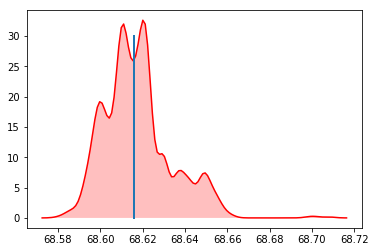

In [53]:
# Here's the resulting density curve. This estimates the distribution of medians. The thick vertical line shows where the median of the original,
# observed data sh lies.
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.kdeplot(resampled_sh.values, shade=True, color="r")
sh_median = sh.median()
ax = plt.plot([sh_median, sh_median], [0, 30], linewidth=2)

In [27]:
# Pretty close, right? Now back to theory. Suppose you have a statistic that estimates some population parameter, but you don't know its sampling
# distribution. The bootstrap principle uses the distribution defined by the observed data to approximate the sampling distribution of that
# statistic.

# The nice thing about bootstrapping is that you can always do it with simulation. The general procedure follows by first simulating B complete data
# sets from the observed data by sampling with replacement. Make sure B is large and that you're sampling WITH replacement to create data sets the
# same size as the original.

# This approximates drawing from the sampling distribution of that statistic, at least as well as the data approximates the true population
# distribution. By calculating the statistic for each simulated data set and using these simulated statistics we can either define a confidence
# interval (e.g. find the 2.5 and the 97.5 percentiles) or take the standard deviation to estimate a standard error of that statistic.

# Notice that this process doesn't use any fancy math or asymptotics. The only assumption behind it is that the observed sample is representative of
# the underlying population.

# We've created the vector fh for you which contains the fathers' heights from the father son data we've been working with. It's the same length as
# the sons' data (1078) which is stored in nh. B, the number of bootstraps we want has been set to 1000. We'll do an example now in small steps.
fh = df["fheight"]
fh.describe()

count    1078.000000
mean       67.687097
std         2.744868
min        59.008000
25%        65.787735
50%        67.766600
75%        69.602980
max        75.433930
Name: fheight, dtype: float64

In [28]:
# Our one sample of observed data is in the vector fh. Use the pandas function sample to sample fh nh*B times. Put the
# result in the variable resampled_fh.

resampled_fh = pd.Series([fh.sample(n=1000, random_state=i).median() for i in range(1000)])
resampled_fh.describe()

count    1000.000000
mean       67.764605
std         0.025966
min        67.669140
25%        67.743660
50%        67.766600
75%        67.778820
max        67.840220
dtype: float64

In [48]:
# Now look at the difference between the median of fh and the median of resampled_fh.
resampled_fh.median() - fh.median()

0.0

In [49]:
# Pretty close, right? Now use the R function sd to estimate the standard error of the vector resampled_fh.
resampled_fh.std()

0.025966030343174518

In [54]:
# We previously did this same process for the sons' data and stored the resampled medians in the 1000-long vector resampled_sh. Find the standard
# error of resampled_sh.
resampled_sh.std()

0.015996585422527965

In [55]:
# Now we'll find a 95% confidence interval for the sons' data with the pandas function quantile. The first argument is the vector of resampled_sh and
# the second is the expression c(.025,.975). Do this now.
resampled_sh.quantile([0.025, 0.975])

0.025    68.592865
0.975    68.652110
dtype: float64

In [56]:
# Pretty close quantiles, right? Now do the same thing for the fathers' data. Recall that it's stored in the vector resampled_fh.
resampled_fh.quantile([0.025, 0.975])

0.025    67.711610
0.975    67.810885
dtype: float64

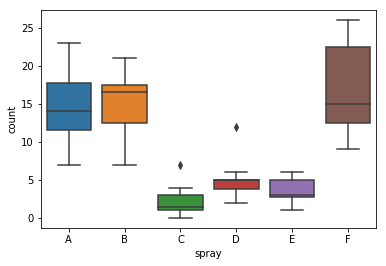

In [60]:
# Another pair of close quantiles, but notice that these quantiles of the fathers' medians differ from those of the sons.

# Bootstrapping is a very diverse and complicated topic and we just skimmed the surface here. The technique we showed you is nonparametric, that is,
# it's not based on any parameterized family of probability distributions. We used only one set of observations that we assumed to be representative
# of the population.

# Finally, the confidence intervals we calculated might not perform very well because of biases but the R package bootstrap provides an easy fix for
# this problem.

# Now, to permutation testing, another handy tool used in group comparisons. As bootstrapping did, permutation testing samples a single dataset a
# zillion times and calculates a statistic based on these samplings.

# Permutation testing, however, is based on the idea of exchangability of group labels. It measures whether or not outcomes are independent of group
# identity. Our zillion samples simply permute group labels associated with outcomes. We'll see an example of this.

# Here's a picture from the dataset InsectSprays which contains counts of the number of bugs killed by six different sprays.

# We'll use permutation testing to compare Spray B with Spray C.

insect_sparys = pd.read_csv("insect-spary.csv")
ax = sns.boxplot(x="spray", y="count", data=insect_sparys)

In [58]:
# Use pandas function shape to find the dimensions of InsectSprays.
insect_sparys.shape

(72, 3)

In [59]:
# Now use the pandas function columns to find what the two columns of InsectSprays contain.
insect_sparys.columns

Index(['Unnamed: 0', 'count', 'spray'], dtype='object')

In [66]:
# We'll use permutation testing to compare Spray B with Spray C. We subsetted data for these two sprays into a data frame subdata. Moreover, the two
# data frames Bdata and Cdata contain the data for their respective sprays.

# Now use the pandas min/max function to find the minimum and maximum counts for Spray B.
Bdata = insect_sparys[insect_sparys["spray"] == "B"]
(Bdata["count"].min(), Bdata["count"].max())

(7, 21)

In [67]:
# The picture makes more sense now, right? Now do the same for Spray C. Its data is in Cdata.
Cdata = insect_sparys[insect_sparys["spray"] == "C"]
(Cdata["count"].min(), Cdata["count"].max())

(0, 7)

In [83]:
# From the ranges (as well as the picture), the sprays look a lot different. We'll test the (obviously false) null hypothesis that their means are
# the same.

def testStat(Bdata, Cdata):
    return Bdata["count"].mean() - Cdata["count"].mean()

# We have created a testStat function for you, then you can run it against Bdata and Cdata.
obs = testStat(Bdata, Cdata)
obs

13.25

In [98]:
# Now this is where the permutation testing starts to involve resampling. We're going to test whether or not the particular group association of the
# counts affects the difference of the means.
BCdata = pd.concat([Bdata, Cdata]).reset_index()
BCdata

,index,Unnamed: 0,count,spray
0,12,13,11,B
1,13,14,17,B
2,14,15,21,B
3,15,16,11,B
4,16,17,16,B
5,17,18,14,B
6,18,19,17,B
7,19,20,17,B
8,20,21,19,B
9,21,22,21,B


In [104]:
# The labels are all mixed up now. We'll do this permuting of labels and then we'll recalculate the difference of the means of the two "new" (really
# newly labelled) groups.

perms = []
for i in range(10000):
    BCdata["spray"] = pd.Series(np.random.permutation(BCdata["spray"]))
    perms.append(testStat(BCdata[BCdata["spray"] == "B"], BCdata[BCdata["spray"] == "C"]))

In [107]:
# We can take the mean of the virtual array of the boolean expression perms > obs. Do this now.
np.mean([1 if p > obs else 0 for p in perms])

0.0

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


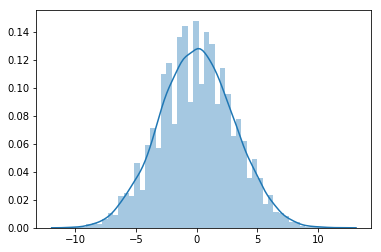

In [108]:
# So on average 0 of the permutations had a difference greater than the observed. That means we would reject the null hypothesis that the means of
# the two sprays were equal.

# Here's a histogram of the difference of the means. Looks pretty normal, right? We can see that the distribution runs roughly between -10 and +10
# and it's centered around 0. The vertical line shows where the observed difference of means was and we see that it's pretty far away from the
# distribution of the resampled permutations. This means that group identification did matter and sprays B and C were quite different.

ax = sns.distplot(perms)

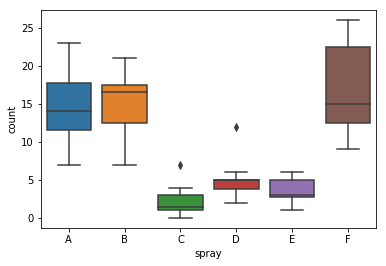

In [109]:
# Here's the picture of the InsectSprays again. Suppose we run the same experiment, this time comparing sprays D and E, which look more alike. We've
# redefined testStat to look at these sprays and subtract the mean of spray E from the mean of spray D.

ax = sns.boxplot(x="spray", y="count", data=insect_sparys)

In [ ]:
# We've also stored off the D and E data in DEcounts and the group labels in group. Run testStat now with DEcounts and group.
